In [10]:
import tensorflow as tf
import time

def measure(x, steps):
  # TensorFlow initializes a GPU the first time it's used, exclude from timing.
  tf.matmul(x, x)
  start = time.time()
  for i in range(steps):
    x = tf.matmul(x, x)
  # tf.matmul can return before completing the matrix multiplication
  # (e.g., can return after enqueing the operation on a CUDA stream).
  # The x.numpy() call below will ensure that all enqueued operations
  # have completed (and will also copy the result to host memory,
  # so we're including a little more than just the matmul operation
  # time).
  _ = x.numpy()
  end = time.time()
  return end - start

shape = (1000, 1000)
steps = 200
print("Time to multiply a {} matrix by itself {} times:".format(shape, steps))

# Run on CPU:
with tf.device("/cpu:0"):
  print("CPU: {} secs".format(measure(tf.random.normal(shape), steps)))

# Run on GPU, if available:
if tf.config.experimental.list_physical_devices("GPU"):
  with tf.device("/gpu:0"):
    print("GPU: {} secs".format(measure(tf.random.normal(shape), steps)))
else:
  print("GPU: not found")

Time to multiply a (1000, 1000) matrix by itself 200 times:
CPU: 1.1079990863800049 secs
GPU: 0.032001495361328125 secs


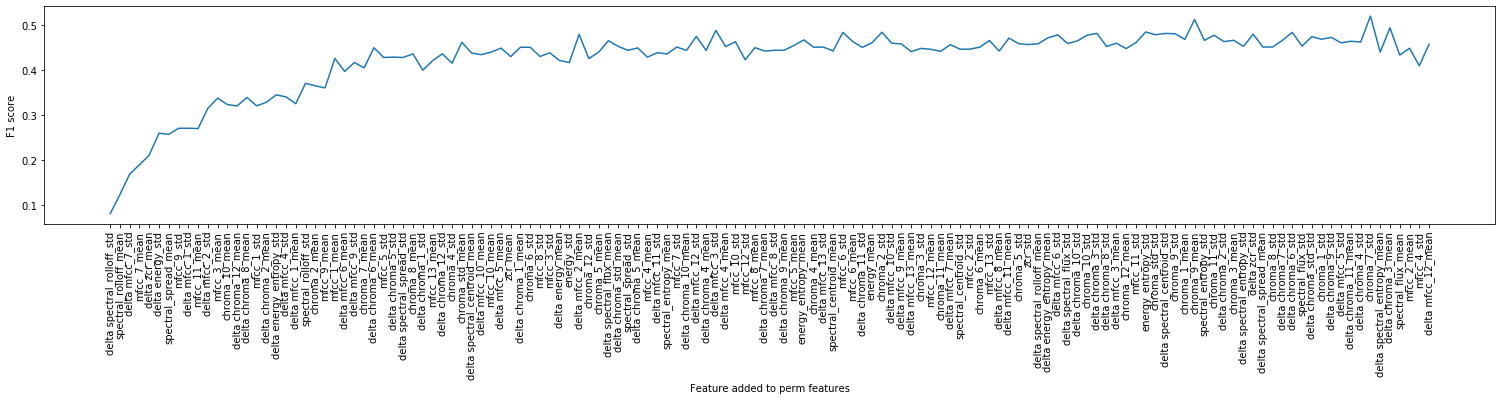

In [2]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

accs = [0.08020649602529828, 0.12300787126463131, 0.16849925331653506, 0.18921994413542337, 0.21067870138284492, 0.2594949967122988, 0.25696025165783903, 0.27034440681242367, 0.27046975486668695, 0.26982659406894766, 0.314691774984948, 0.33747293791705085, 0.32323729453883704, 0.31997704810186506, 0.338976559433691, 0.3202603858444293, 0.3284160514899897, 0.34472406817344625, 0.3402924236128696, 0.32513511673059176, 0.37049138041446045, 0.364864475704916, 0.3602310839923936, 0.42584826717936963, 0.3969493453960693, 0.41685932703060213, 0.4048369239320708, 0.4495320016449723, 0.4279740594899404, 0.4286107591748083, 0.42794109505659605, 0.4360011937905197, 0.39959299838137713, 0.42071213982496214, 0.4359662057216694, 0.41522410722351466, 0.46172853256293794, 0.4375882582957472, 0.4341688853307463, 0.4399262771715479, 0.448769800627457, 0.4298457749401205, 0.45070025081630505, 0.45055603383329573, 0.4300885520040012, 0.43821574308423966, 0.4211784052250226, 0.41657997000317265, 0.47930799516585554, 0.4255014711344024, 0.4396713851924986, 0.465210745842107, 0.45267137790541145, 0.4438423739119317, 0.44920400021325796, 0.42850721798118635, 0.43872009145531693, 0.4357393946778525, 0.4511058402131442, 0.443681743662068, 0.4747143989288922, 0.44360091151386716, 0.4880743711978024, 0.4519170774557953, 0.46302079965865195, 0.4228694994956966, 0.4497914086918328, 0.44216974497922157, 0.4438586379456283, 0.4440141588058976, 0.45477898647583626, 0.46697670460670093, 0.4507958811280993, 0.4509215802545401, 0.4424395514626431, 0.4837859894055674, 0.4633215554209323, 0.4502974986836083, 0.46090897795699426, 0.4841220366892262, 0.459805680612586, 0.45791357250011455, 0.44087836936022445, 0.44810940198570615, 0.4461040152053083, 0.4415944256620793, 0.45639394783093123, 0.44625779453600173, 0.4464946738016506, 0.4507445905711583, 0.465541235395537, 0.4421892868627585, 0.47102324549842545, 0.45854075801888855, 0.456634392022377, 0.4584653829382881, 0.47177366032988316, 0.4782813950473625, 0.4589652277587416, 0.4647483191544991, 0.4774610859886469, 0.48152227701900613, 0.4523848101667875, 0.45955466008230755, 0.44764435853787693, 0.4610841344186369, 0.48466297446461554, 0.4785010226218255, 0.48135020467228307, 0.480766052196609, 0.46825281696701626, 0.5123978624028863, 0.4659260732598297, 0.4775080770437274, 0.4631227839688966, 0.46612089621752795, 0.4526015606187116, 0.47963979657506195, 0.45105644591054544, 0.45119745058233535, 0.46619163740200875, 0.4837453164980515, 0.4531539451180263, 0.47422482245005887, 0.4684443570943061, 0.47255031594551167, 0.4605055207648496, 0.46397675624853907, 0.46225291021820236, 0.5198968245301434, 0.43990461891508365, 0.49392135488446, 0.4331781253345248, 0.44849004658171243, 0.40939378223710543, 0.45737809933736495]
features = ['delta spectral_rolloff_std', 'spectral_rolloff_mean', 'delta mfcc_7_std', 'mfcc_7_mean', 'delta zcr_mean', 'delta energy_std', 'spectral_spread_mean', 'mfcc_9_std', 'delta mfcc_1_std', 'mfcc_11_mean', 'delta mfcc_2_std', 'mfcc_3_mean', 'chroma_10_mean', 'delta chroma_12_mean', 'delta chroma_8_mean', 'mfcc_1_std', 'delta chroma_2_mean', 'delta energy_entropy_std', 'delta mfcc_4_std', 'delta mfcc_1_mean', 'spectral_rolloff_std', 'chroma_2_mean', 'mfcc_9_mean', 'mfcc_1_mean', 'delta mfcc_6_mean', 'delta mfcc_9_std', 'chroma_7_mean', 'delta chroma_6_mean', 'mfcc_5_std', 'delta chroma_5_std', 'delta spectral_spread_std', 'chroma_8_mean', 'delta chroma_1_std', 'mfcc_13_mean', 'delta chroma_12_std', 'chroma_4_std', 'chroma_std_mean', 'delta spectral_centroid_mean', 'delta mfcc_10_mean', 'mfcc_10_mean', 'delta mfcc_5_mean', 'zcr_mean', 'delta chroma_1_mean', 'chroma_6_std', 'mfcc_8_std', 'mfcc_3_std', 'delta energy_mean', 'energy_std', 'delta mfcc_2_mean', 'chroma_12_std', 'chroma_5_mean', 'delta spectral_flux_mean', 'delta chroma_std_mean', 'spectral_spread_std', 'delta chroma_5_mean', 'mfcc_4_mean', 'delta mfcc_11_std', 'spectral_entropy_mean', 'mfcc_7_std', 'delta chroma_10_mean', 'delta mfcc_12_std', 'delta chroma_4_mean', 'delta mfcc_3_std', 'delta mfcc_4_mean', 'mfcc_10_std', 'mfcc_12_std', 'mfcc_8_mean', 'delta chroma_7_mean', 'delta mfcc_8_std', 'delta chroma_9_mean', 'mfcc_5_mean', 'energy_entropy_mean', 'chroma_4_mean', 'delta mfcc_13_std', 'spectral_centroid_mean', 'mfcc_6_std', 'mfcc_6_mean', 'delta chroma_11_std', 'energy_mean', 'chroma_2_std', 'delta mfcc_10_std', 'delta mfcc_9_mean', 'delta mfcc_13_mean', 'chroma_3_std', 'mfcc_12_mean', 'chroma_11_mean', 'delta mfcc_7_mean', 'spectral_centroid_std', 'mfcc_2_std', 'chroma_6_mean', 'mfcc_13_std', 'delta mfcc_8_mean', 'delta mfcc_11_mean', 'chroma_5_std', 'zcr_std', 'delta spectral_rolloff_mean', 'delta energy_entropy_mean', 'delta mfcc_6_std', 'delta spectral_flux_std', 'delta chroma_10_std', 'chroma_10_std', 'delta chroma_3_std', 'delta chroma_8_std', 'delta mfcc_3_mean', 'chroma_12_mean', 'mfcc_11_std', 'energy_entropy_std', 'chroma_std_std', 'delta spectral_centroid_std', 'chroma_9_std', 'chroma_1_mean', 'chroma_9_mean', 'spectral_entropy_std', 'chroma_11_std', 'delta chroma_2_std', 'chroma_3_mean', 'delta spectral_entropy_std', 'delta zcr_std', 'delta spectral_spread_mean', 'chroma_8_std', 'delta chroma_7_std', 'delta chroma_6_std', 'spectral_flux_std', 'delta chroma_std_std', 'chroma_1_std', 'delta chroma_9_std', 'delta mfcc_5_std', 'delta chroma_11_mean', 'delta chroma_4_std', 'chroma_7_std', 'delta spectral_entropy_mean', 'delta chroma_3_mean', 'spectral_flux_mean', 'mfcc_2_mean', 'mfcc_4_std', 'delta mfcc_12_mean']

plt.figure(figsize=(26,4))
plt.plot(features, accs)
plt.xticks(rotation=90)
plt.xlabel('Feature added to perm features')
plt.ylabel('F1 score')
plt.show()

In [3]:
print(max(accs))

0.5198968245301434
